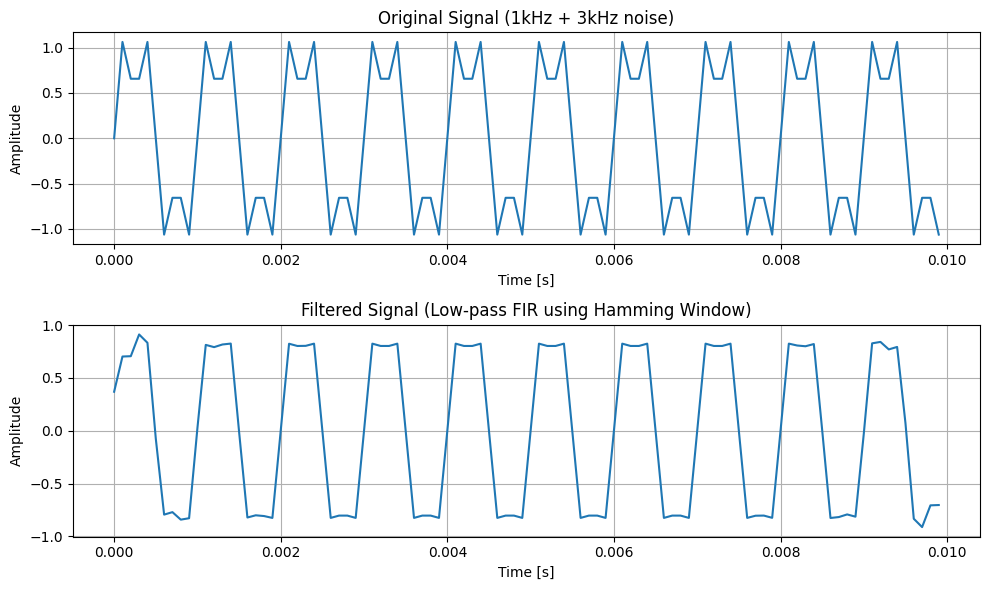

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# --- Filter Design Parameters ---
fs = 10000       # Sampling frequency (Hz)
fc = 1500        # Cutoff frequency (Hz) — to pass 1kHz and filter out 3kHz
M = 51           # Number of filter taps

# --- Compute Filter Coefficients (FIR Low-pass using Hamming Window) ---
n = np.arange(M)
fc_norm = fc / (fs / 2)  # Normalize w.r.t Nyquist frequency///This makes fc_norm fall between 0 and 1 — which is needed for digital filter design.
h_ideal = np.sinc(2 * fc_norm * (n - (M - 1) / 2))
window = np.hamming(M)
h = h_ideal * window
h = h / np.sum(h)  # Normalize to preserve signal amplitude

# --- Create Test Signal: 1kHz signal + 3kHz noise ---
t = np.arange(0, 0.01, 1/fs)  # 10 ms duration
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 3000 * t)

# --- Apply Filter ---
y = convolve(x, h, mode='same')

# --- Plotting ---
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title("Original Signal (1kHz + 3kHz noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.title("Filtered Signal (Low-pass FIR using Hamming Window)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


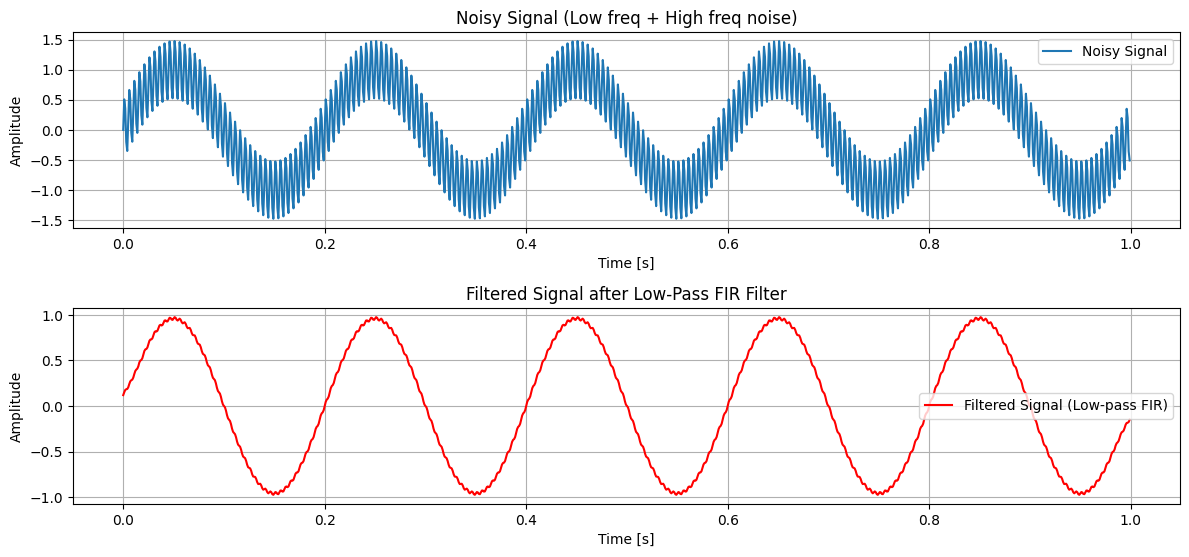

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 1000          # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second time vector

# Create a signal: low freq + high freq noise
f_signal = 5       # 5 Hz signal (low freq)
f_noise = 200      # 200 Hz noise (high freq)

signal = np.sin(2*np.pi*f_signal*t)                     # Low freq signal
noise = 0.5 * np.sin(2*np.pi*f_noise*t)                 # High freq noise
x = signal + noise                                       # Noisy signal

# --- Design a low-pass FIR filter ---
# Simple moving average filter (length = 31)
N = 31
h = np.ones(N) / N   # Moving average filter coefficients

# Apply filter using convolution
y = np.convolve(x, h, mode='same')  # 'same' keeps output length same as input

# --- Plot ---
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, x, label='Noisy Signal')
plt.title("Noisy Signal (Low freq + High freq noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(t, y, label='Filtered Signal (Low-pass FIR)', color='red')
plt.title("Filtered Signal after Low-Pass FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
